![WhatsApp Image 2024-04-24 at 23.07.22_8375da1c.jpg](<attachment:WhatsApp Image 2024-04-24 at 23.07.22_8375da1c.jpg>)
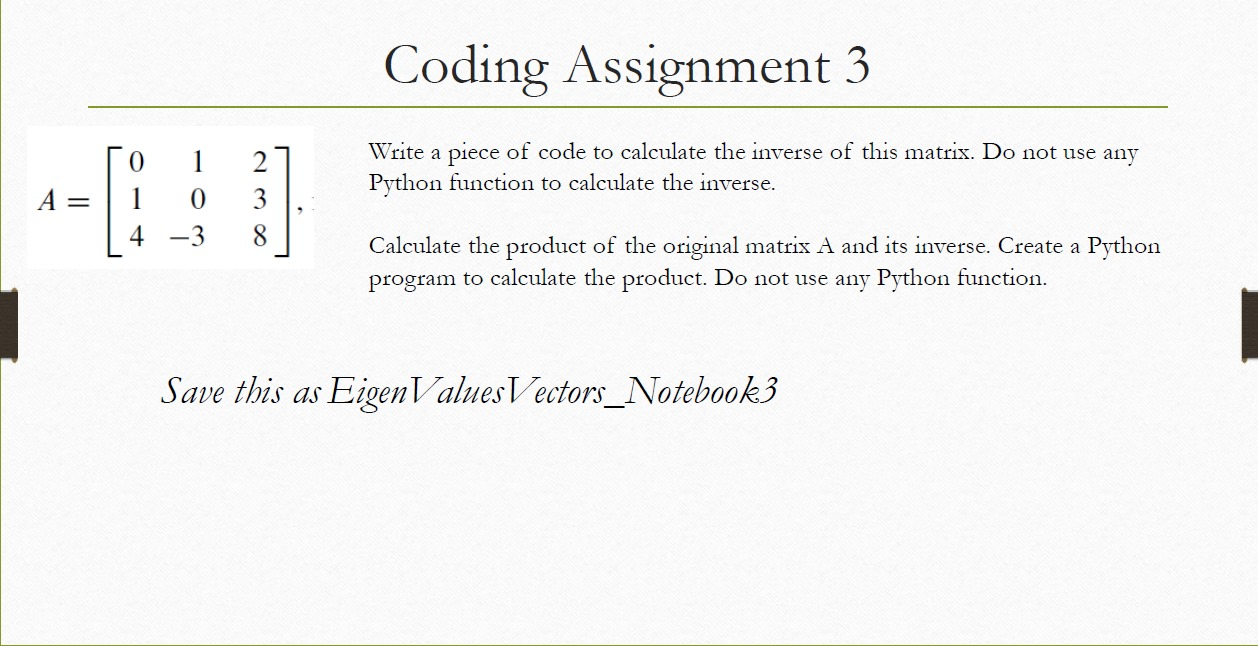

To compute the inverse of a matrix , gaussian elimination can be used .
1. Original matrix is added an augmented matrix to identity matrix .
2. Row transformations are performed in original matrix and corresponding done in identity marix
3. Operations are performed on original matrix to convert to identity matrix .
4. The changed identity matrix is it's inverse .
5. when original matrix and it's inverse are multiplied , identity matrix is obtained .

In [18]:
import numpy as np # Library to work with arrays

In [19]:
def inverse_matrix(A):
    n = A.shape[0]  # Assuming A is a square matrix
    if np.linalg.det(A) == 0:
        return "Matrix is singular, inverse does not exist."

    # Augment A with the identity matrix of the same size
    augmented_matrix = np.hstack((A, np.eye(n)))

    # Perform Gaussian elimination with partial pivoting
    for i in range(n):
        # Find the pivot row (maximum element in the current column)
        pivot_row = np.argmax(np.abs(augmented_matrix[i:, i])) + i

        # Swap current row with the pivot row
        augmented_matrix[[i, pivot_row]] = augmented_matrix[[pivot_row, i]]

        # Divide row i by the pivot element to make it 1
        pivot_element = augmented_matrix[i, i]
        augmented_matrix[i, :] /= pivot_element

        # Eliminate non-zero elements below the pivot
        for j in range(i + 1, n):
            multiplier = augmented_matrix[j, i]
            augmented_matrix[j, :] -= multiplier * augmented_matrix[i, :]

    # Perform back substitution
    for i in range(n - 1, 0, -1):
        for j in range(i - 1, -1, -1):
            multiplier = augmented_matrix[j, i]
            augmented_matrix[j, :] -= multiplier * augmented_matrix[i, :]

    # Extract the inverse matrix from the augmented matrix
    inverse = augmented_matrix[:, n:]
    return inverse


In [20]:
def matrix_multiplication(A, B):
    m, n = A.shape # A is m x n
    p, q = B.shape # B is p x q
    if n != p:
        return "Number of columns in A must be equal to number of rows in B." # Return an error message
    C = np.zeros((m, q)) # Initialize the result matrix with zeros
    for i in range(m):
        for j in range(q):
            C[i, j] = np.sum(A[i, :] * B[:, j]) # Compute the dot product of the i-th row of A and the j-th column of B
    return C # Return the result matrix

In [21]:
# Example usage
A = np.array([[0,1,2],[1,0,3],[4,-3,8]]) # Define a 3x3 matrix A
print("Matrix A:")
print(A)
inverse_A = inverse_matrix(A) # Compute the inverse of A
print("Inverse of A:")
print(inverse_A)

Matrix A:
[[ 0  1  2]
 [ 1  0  3]
 [ 4 -3  8]]
Inverse of A:
[[-4.5  7.  -1.5]
 [-2.   4.  -1. ]
 [ 1.5 -2.   0.5]]


In [22]:
print("A * A^(-1):")
print(matrix_multiplication(A, inverse_A)) # Should be the identity matrix

A * A^(-1):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
